**<center><font size=5>Predict of ERP in EEG data</font></center>**
**<center>Gifted Group <i>vs</i> Control Group</center>**
***
**author**: Ábner Lucas
**date**: Junho, 2022
**[GitHub Repository](https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git)**

### Table of Contents
- <a href='#env'>1. Configurando o Ambiente</a>
  - <a href='import_lib'>1.1. Bibliotecas</a>
  - <a href='load_evoked'>1.2. Carregar dados evocados</a>
  - <a href='load_trials'>1.3. Carregar trials</a>
  - <a href='load_ip'>1.4. Carregar perfomances individuais</a>
- <a href='#predict'>2. Predizendo séries de ERPs</a>
  - <a href='#p_t_s'>2.1 .Tendência e sazionalidade das médias dos sensores por amostra com os sujeitos em série por grupo</a>
  - <a href='#p_mlp_c'>2.2. Predição com MLP (DFF) na base Controle</a>
  - <a href='#p_mlp_g'>2.3. Predição com MLP (DFF) na base Superdotados</a>
  - <a href='#p_class'>2.4. Classificação a partir das predições anteriores (MLP - DFF)</a>

### <a id='env'>1. Configurando o Ambiente</a>

#### <a id='import_lib'>1.1. Importando bibliotecas</a>

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# !git clone https://github.com/abner-lucas/time_series_prediction_on_EEG_data.git

In [4]:
import os
import sys
sys.path.append(os.path.abspath('..'))
# sys.path.append(os.path.abspath('/content/time_series_prediction_on_EEG_data/'))
from src.plot_series import *
from src.load_dataset import *
from src.compile_data import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# DFF
from src.functions_dff import *
from src.metrics import *
#from keras.wrappers.scikit_learn import KerasRegressor
# !pip install scikeras
from scikeras.wrappers import KerasRegressor
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [5]:
filenames_list = os.listdir('D:/Documentos/Mestrado/2021/UFPA Ciência Computação/EEG/outputs_eeg/') # lista de nomes de arquivos no diretório
# filenames_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/')

xs = [f'{x[:7]} {x[7:11]}' for x in filenames_list if x.endswith('trials.csv')]

print('Quantidade total de coletas: ' + str(len(xs)) + ' sujeitos')

Quantidade total de coletas: 19 sujeitos


#### <a id='load_evoked'>1.2. Carregar dados evocados</a>

In [6]:
EEG_evoked = load_evoked(filenames_list)

100%|██████████| 76/76 [00:01<00:00, 43.03it/s]


In [7]:
EEG_evoked.info()
EEG_evoked.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79819 entries, 0 to 79818
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  79819 non-null  object 
 1   group       79819 non-null  object 
 2   time        79819 non-null  int64  
 3   F7          79819 non-null  float64
 4   F3          79819 non-null  float64
 5   Fz          79819 non-null  float64
 6   F4          79819 non-null  float64
 7   F8          79819 non-null  float64
 8   P7          79819 non-null  float64
 9   P3          79819 non-null  float64
 10  Pz          79819 non-null  float64
 11  P4          79819 non-null  float64
 12  P8          79819 non-null  float64
 13  F5          79819 non-null  float64
 14  F1          79819 non-null  float64
 15  F2          79819 non-null  float64
 16  F6          79819 non-null  float64
 17  P5          79819 non-null  float64
 18  P1          79819 non-null  float64
 19  P2          79819 non-nul

,subject_id,group,time,F7,F3,Fz,F4,F8,P7,P3,...,P4,P8,F5,F1,F2,F6,P5,P1,P2,P6
0,0005,gifted,-200,-0.176348,0.849731,0.014443,0.452169,-0.171023,-1.041862,-0.684168,...,0.329154,0.121741,0.494943,0.063033,0.635906,0.347795,-0.888329,-0.210373,0.093809,0.265793
1,0005,gifted,-199,-0.148111,0.897410,0.038878,0.482357,-0.184909,-1.017096,-0.670512,...,0.257764,0.043010,0.538742,0.092881,0.667889,0.363868,-0.894976,-0.211093,0.090957,0.173834
2,0005,gifted,-198,-0.121154,0.942442,0.056902,0.510999,-0.202402,-0.988336,-0.647344,...,0.188166,-0.043500,0.580370,0.114510,0.700161,0.372634,-0.894099,-0.200264,0.093188,0.078204
3,0005,gifted,-197,-0.096639,0.984127,0.067994,0.538019,-0.223199,-0.956441,-0.614536,...,0.121630,-0.136570,0.618619,0.127169,0.732848,0.373948,-0.885026,-0.177193,0.100572,-0.019290
4,0005,gifted,-196,-0.075605,1.021787,0.071840,0.563275,-0.246939,-0.922200,-0.572049,...,0.059332,-0.234849,0.652332,0.130375,0.765948,0.367748,-0.867148,-0.141429,0.113081,-0.116824


#### <a id='load_trials'>1.3. Carregar trials</a>

In [ ]:
EEG_trials = load_trials(filenames_list)

In [ ]:
EEG_trials.info()
EEG_trials.head()

#### <a id='load_ip'>1.4. Carregar perfomances individuais</a>

In [ ]:
EEG_ip = load_ip(filenames_list)
EEG_ip.head()

100%|██████████| 76/76 [00:00<00:00, 1177.59it/s]


,subject_id,group,condition,response_expected,response_obtained,response_time
0,0015,gifted,Stimulus/40_100_R,different,different,11229
1,0015,gifted,Stimulus/4_0_R,different,different,25932
2,0015,gifted,Stimulus/2_100,same,same,2481
3,0015,gifted,Stimulus/48_50_R,different,different,13582
4,0015,gifted,Stimulus/46_100_R,different,different,16477


In [54]:
#EEG_diferentes = EEG_data.loc[EEG_data['condition'].str.endswith('R')]

### <a id='predict'>2. Predizendo séries de ERPs</a>

#### <a id='p_t_s'>2.1. Tendência e sazionalidade das médias dos sensores por amostra com os sujeitos em série por grupo</a>

In [73]:
S_control_mean = control_subjects.copy().drop(columns=['subject_id','group','time'])
S_control_mean = S_control_mean.mean(axis=1)
c_average = pd.DataFrame({'time':range(len(S_control_mean)), 'control': S_control_mean})
#c_average['time'] = pd.to_datetime(c_average['time'], unit='ms')
c_average.set_index('time', drop=True, inplace=True)

S_gifted_mean = gifted_subjects.copy().drop(columns=['subject_id','group','time'])
S_gifted_mean = S_gifted_mean.mean(axis=1)
g_average = pd.DataFrame({'time':range(len(S_gifted_mean)), 'gifted': S_gifted_mean})
g_average.set_index('time', drop=True, inplace=True)

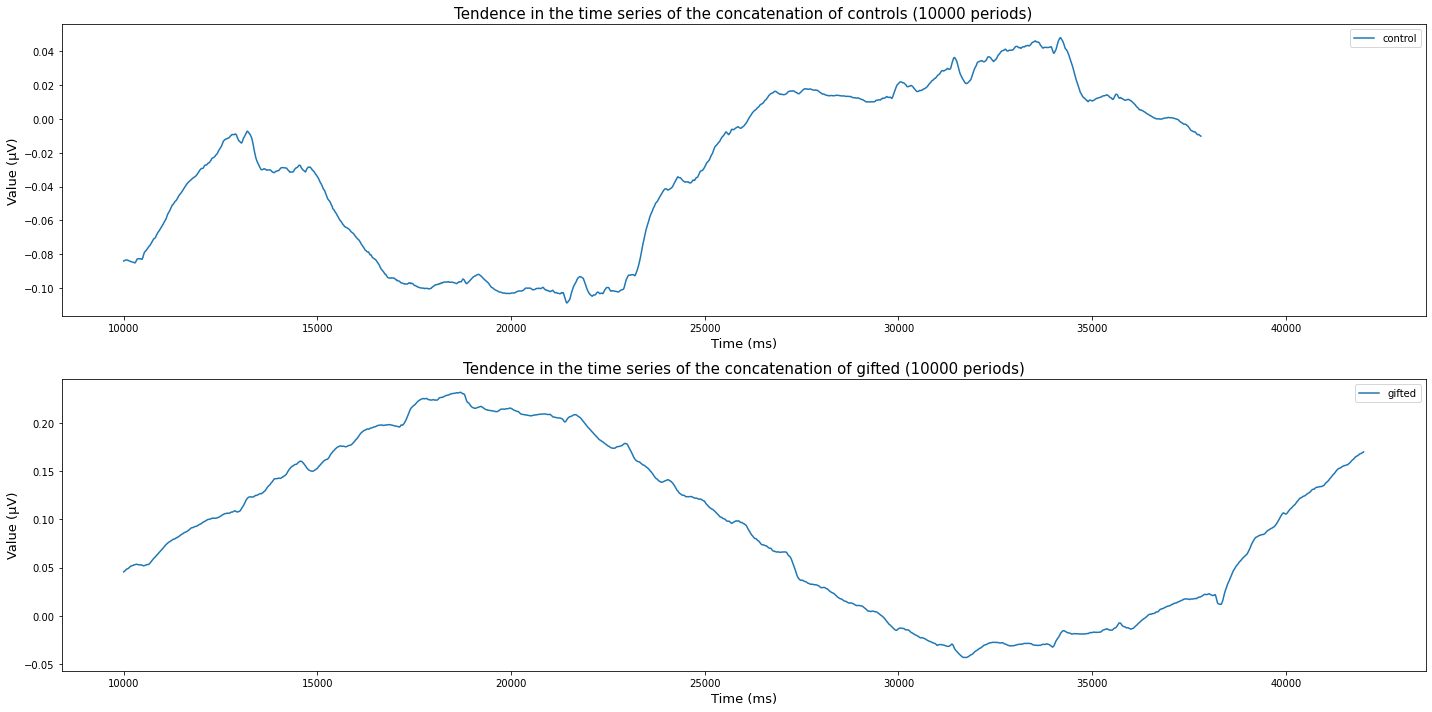

In [74]:
sp = Subplot2D(nrows=2, ncols=1, figsize=(20,10))
sp.add_subplot(c_average.rolling(10000).mean(), 1, 'Tendence in the time series of the concatenation of controls (10000 periods)')
sp.add_subplot(g_average.rolling(10000).mean(), 2, 'Tendence in the time series of the concatenation of gifted (10000 periods)', sharex=1)
fig10 = sp.show();
# fig10.savefig('outputs_fig/fig10_tendence_concatenation_subjects_gifted.png')
fig10.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig10_tendence_concatenation_subjects_gifted.png')

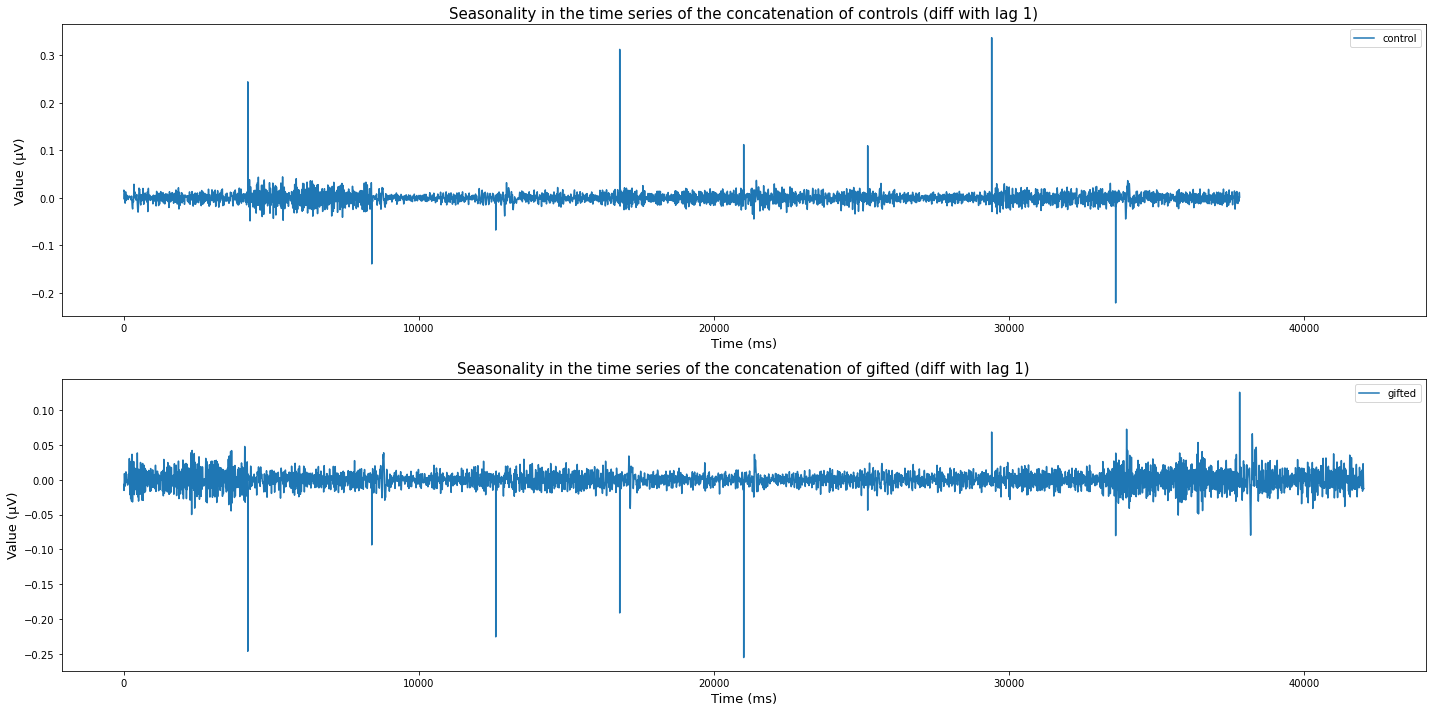

In [75]:
sp = Subplot2D(nrows=2, ncols=1, figsize=(20,10))
sp.add_subplot(c_average.diff(1), 1, 'Seasonality in the time series of the concatenation of controls (diff with lag 1)')
sp.add_subplot(g_average.diff(1), 2, 'Seasonality in the time series of the concatenation of gifted (diff with lag 1)', sharex=1)
fig11 = sp.show();
# fig11.savefig('outputs_fig/fig11_seasonality_concatenation_subjects_controls.png')
fig10.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig11_seasonality_concatenation_subjects_controls.png')

#### <a id='p_mlp_c'>2.2. Predição com MLP (DFF) na base Controle</a>

In [4]:
sensor_frontal = ['F7', 'F5', 'F3', 'F1', 'Fz','F8', 'F6', 'F4', 'F2']
sensor_parietal = ['P7', 'P5', 'P3', 'P1', 'Pz', 'P8', 'P6', 'P4', 'P2']

In [5]:
#Pegando somente as amostras do início do estímulo até 1,5 segundos
controls = EEG_evoked[EEG_evoked['group'] == 'control'].copy()
control_subjects = controls[(controls['time'] >= 0) & (controls['time'] <= 1500)]

#separar em df com os canais frontal e parietal
s_control_frontal = control_subjects[['subject_id', 'group', 'time'] + sensor_frontal].copy()
s_control_parietal = control_subjects[['subject_id', 'group', 'time'] + sensor_parietal].copy()

print('Quantidade total de sujeitos no grupo: ' + str(len(control_subjects['subject_id'].unique())))

Quantidade total de sujeitos no grupo: 9


###### <a id='p_a2_1'>3.4.2.1 Modelo Controle-Frontal</a>

In [6]:
s_train, s_validation, s_test, mean_sensors_control = train_test_split(s_control_frontal, val_size=0.2, test_size=0.2)

# train_norm = data_norm(s_train['mean'].values)
# train_norm = data_norm(s_validation['mean'].values)
# test_norm = data_norm(s_test['mean'].values)
train_norm = data_norm(s_train.values, v_min=-1, v_max=1)
validation_norm = data_norm(s_validation.values, v_min=-1, v_max=1)
test_norm = data_norm(s_test.values, v_min=-1, v_max=1)

steps = 18 #4200

# x_train, y_train = split_sequence(data=train_norm, n_steps=steps)
# x_validation, y_validation = split_sequence(data=validation_norm, n_steps=steps)
# x_test, y_test = split_sequence(data=test_norm, n_steps=steps)
x_train, y_train = split_sequence(data=s_train.values, n_steps=steps)
x_validation, y_validation = split_sequence(data=s_validation.values, n_steps=steps)
x_test, y_test = split_sequence(data=s_test.values, n_steps=steps)

In [7]:
# paramns = {'batch_size': [32, 64, 128], 'epochs': [100, 200, 300], 'optimizer': ['adam', 'rmsprop']}
# model = KerasRegressor(build_fn=network_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=paramns, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(x_train, y_train)

paramns = {'n_features':9,
           'n_neurons':9,
           'kernel_initializer':'random_uniform',
           'activation': 'relu',
           'func_loss': 'mse',
           'optimizer': 'sgd',
           'metrics': ['mae']}

network_model = lambda: MLP(**paramns)
n_epochs = 150
mlp_regressor_control = KerasRegressor(build_fn=network_model, epochs=n_epochs, batch_size=32)

In [9]:
#ignore UserWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    model_control = mlp_regressor_control.fit(x_train, y_train, validation_data=(x_validation, y_validation), shuffle=False)

Epoch 1/150
329/329 [==============================] - 2s 4ms/step - loss: 0.6949 - mae: 0.5946 - val_loss: 0.8945 - val_mae: 0.7064
Epoch 2/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4912 - mae: 0.5051 - val_loss: 0.8443 - val_mae: 0.6828
Epoch 3/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4476 - mae: 0.4826 - val_loss: 0.8362 - val_mae: 0.6814
Epoch 4/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4414 - mae: 0.4797 - val_loss: 0.8292 - val_mae: 0.6809
Epoch 5/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4386 - mae: 0.4800 - val_loss: 0.8205 - val_mae: 0.6815
Epoch 6/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4353 - mae: 0.4802 - val_loss: 0.7999 - val_mae: 0.6758
Epoch 7/150
329/329 [==============================] - 1s 3ms/step - loss: 0.4321 - mae: 0.4787 - val_loss: 0.7972 - val_mae: 0.6763
Epoch 8/150
329/329 [==============================] - 1s 3ms/step - 

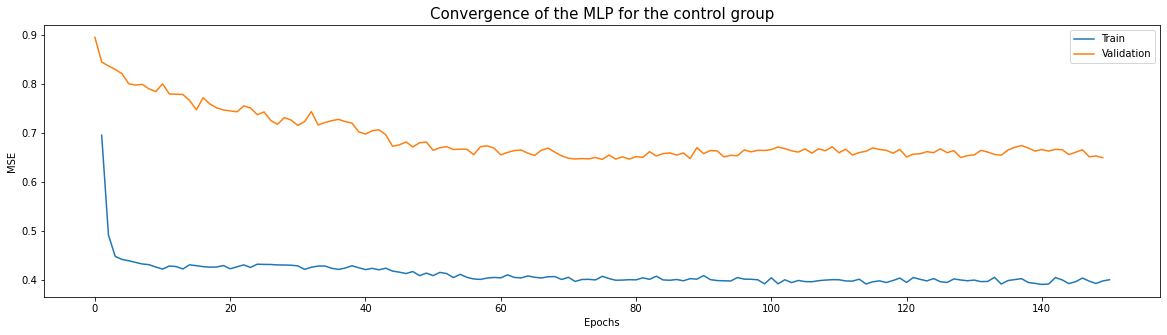

In [10]:
plt.figure(figsize=(20,5))
x = np.arange(1, len(model_control.history_['loss']) + 1)
plt.plot(x, model_control.history_['loss'], label='Train')
plt.plot(model_control.history_['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Convergence of the MLP for the control group',fontsize=15)
plt.legend()
plt.savefig(f'outputs_fig/fig12_convergence_150_mse_mlp_regressor_control.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig12_convergence_150_mse_mlp_regressor_control.png')

In [11]:
pred_control = mlp_regressor_control.predict(x_test)
# print('RMSE: ' + str(RMSE(y_test, pred_control)))
# print('MAE: ' + str(MAE(y_test, pred_control)))
# print('MAPE: ' + str(MAPE(y_test, pred_control)))

rmse = np.sqrt(mean_squared_error(y_test, pred_control))
mae = mean_absolute_error(y_test, pred_control)
mape = mean_absolute_percentage_error(y_test, pred_control)
print(f'Métricas de validação no grupo Controle')
print(f'RMSE: {rmse:.5f}')
print(f'MAE:  {mae:.5f}')
print(f'MAPE: {mape:.2f}%')

47/47 [==============================] - 0s 2ms/step
Métricas de validação no grupo Controle
RMSE: 1.25015
MAE:  0.96552
MAPE: 3.33%


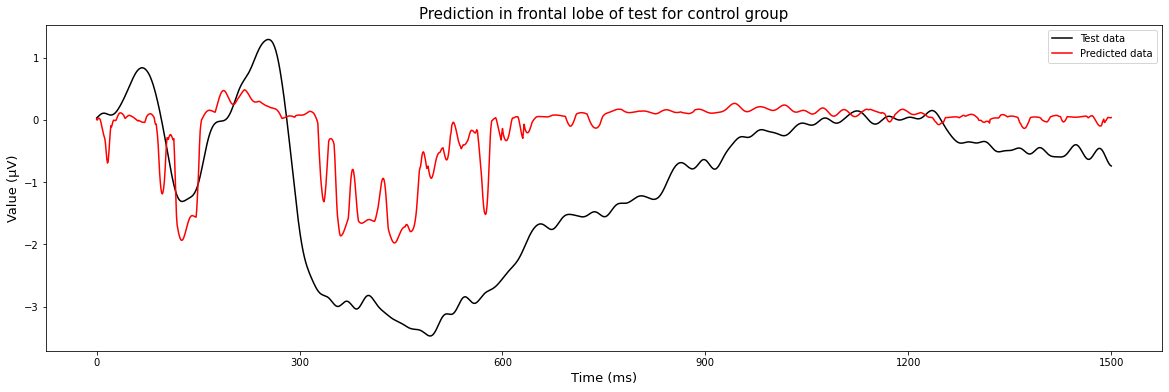

In [12]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Test data')
plt.plot(pred_control, 'r', label='Predicted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Prediction in frontal lobe of test for control group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig13_prediction_frontal_test_control.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig13_prediction_frontal_test_control.png')

#### <a id='p_mlp_g'>2.3. Predição com MLP (DFF) na base Superdotados</a>

In [38]:
#Pegando somente as amostras do início do estímulo até 1,5 segundos
gifteds = EEG_evoked[EEG_evoked['group'] == 'gifted'].copy()
gifted_subjects = pd.DataFrame(columns=gifteds.columns)
for subject in gifteds['subject_id'].unique():
    gifted_subjects = gifteds[gifteds['subject_id'] == subject].iloc[200:1701]

#Separando um sujeito para o teste final com regressão e classificação
s_classify = [gifted_subjects['subject_id'].unique()[-1]]
gifted_subjects = gifted_subjects[~gifted_subjects['subject_id'].isin(s_classify)]

print('Quantidade total de sujeitos no grupo: ' + str(len(gifted_subjects['subject_id'].unique())))

Quantidade total de sujeitos no grupo: 9


In [12]:
s_train, s_validation, s_test, mean_sensors_gifted = train_test_split(gifted_subjects, val_size=0.2, test_size=0.2)

# train_norm = data_norm(s_train['mean'].values)
# train_norm = data_norm(s_validation['mean'].values)
# test_norm = data_norm(s_test['mean'].values)
train_norm = data_norm(s_train.values, v_min=-1, v_max=1)
validation_norm = data_norm(s_validation.values, v_min=-1, v_max=1)
test_norm = data_norm(s_test.values, v_min=-1, v_max=1)

steps = 18 #4200

# x_train, y_train = split_sequence(data=train_norm, n_steps=steps)
# x_validation, y_validation = split_sequence(data=validation_norm, n_steps=steps)
# x_test, y_test = split_sequence(data=test_norm, n_steps=steps)
x_train, y_train = split_sequence(data=s_train.values, n_steps=steps)
x_validation, y_validation = split_sequence(data=s_validation.values, n_steps=steps)
x_test, y_test = split_sequence(data=s_test.values, n_steps=steps)

In [13]:
# paramns = {'batch_size': [32, 64, 128], 'epochs': [100, 200, 300], 'optimizer': ['adam', 'rmsprop']}
# model = KerasRegressor(build_fn=network_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=paramns, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(x_train, y_train)

paramns = {'n_features':18,
           'n_neurons':18,
           'kernel_initializer':'random_uniform',
           'activation': 'relu',
           'func_loss': 'mse',
           'optimizer': 'adam',
           'metrics': 'accuracy'}

network_model = lambda: MLP(**paramns)
n_epochs = 150
mlp_regressor_gifted = KerasRegressor(build_fn=network_model, epochs=n_epochs, batch_size=32)

In [14]:
#ignore UserWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    model_gifted = mlp_regressor_gifted.fit(x_train, y_train, validation_data=(x_validation, y_validation), shuffle=False)

Epoch 1/150
919/919 [==============================] - 3s 3ms/step - loss: 0.0173 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 2/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0100 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 3/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 4/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 5/150
919/919 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 6/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 7/150
919/919 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 

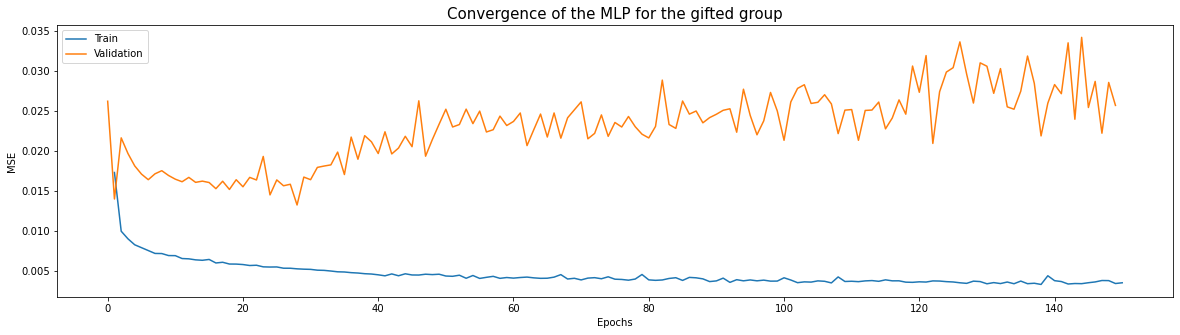

In [15]:
plt.figure(figsize=(20,5))
x = np.arange(1, len(model_gifted.history_['loss']) + 1)
plt.plot(x, model_gifted.history_['loss'], label='Train')
plt.plot(model_gifted.history_['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Convergence of the MLP for the gifted group',fontsize=15)
plt.legend()
plt.savefig(f'outputs_fig/fig14_convergence_150_mse_mlp_regressor_gifted.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig14_convergence_150_mse_mlp_regressor_gifted.png')

In [16]:
pred_gifted = mlp_regressor_gifted.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, pred_gifted))
mae = mean_absolute_error(y_test, pred_gifted)
mape = mean_absolute_percentage_error(y_test, pred_gifted)
print(f'Métricas de validação no grupo Superdotado')
print(f'RMSE: {rmse:.5f}')
print(f'MAE:  {mae:.5f}')
print(f'MAPE: {mape:.2f}%')

132/132 [==============================] - 0s 2ms/step
Métricas de validação no grupo Superdotado
RMSE: 0.26221
MAE:  0.16737
MAPE: 16.97%


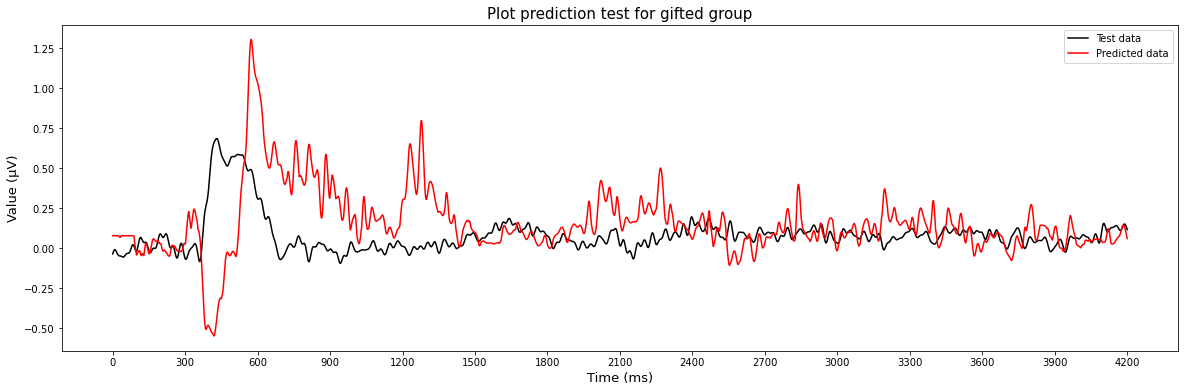

In [17]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Test data')
plt.plot(pred_gifted, 'r', label='Predicted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Plot prediction test for gifted group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig15_prediction_test_gifted.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig15_prediction_test_gifted.png')

#### <a id='p_class'>2.4. Classificação a partir das predições anteriores (MLP - DFF)</a>

In [18]:
df_s_classify = EEG_evoked[(EEG_evoked['group'] == 'gifted') & (EEG_evoked['subject_id'].isin(s_classify))].copy()

mean_sensor = df_s_classify[df_s_classify.columns[3:]].mean(axis=1).reset_index(drop=True)
df_s_classify['mean'] = mean_sensor.values

x_pred, y_pred = split_sequence(data=df_s_classify[df_s_classify.columns[3:]].values, n_steps=steps)

In [19]:
pred_control = mlp_regressor_control.predict(x_pred)
pred_gifted = mlp_regressor_gifted.predict(x_pred)

rmse = np.sqrt(mean_squared_error(mean_sensors_control, pred_control))
mae = mean_absolute_error(mean_sensors_control, pred_control)
mape = mean_absolute_percentage_error(mean_sensors_control, pred_control)
metrics = [[rmse, mae, mape]]

rmse = np.sqrt(mean_squared_error(mean_sensors_gifted, pred_gifted))
mae = mean_absolute_error(mean_sensors_gifted, pred_gifted)
mape = mean_absolute_percentage_error(mean_sensors_gifted, pred_gifted)
metrics += [[rmse, mae, mape]]
metrics

132/132 [==============================] - 0s 2ms/step


[[0.10166967962475792, 0.0674213792302215, 12.72362685304638],
 [0.11364270728717236, 0.0625258929573439, 4.9558187096145305]]

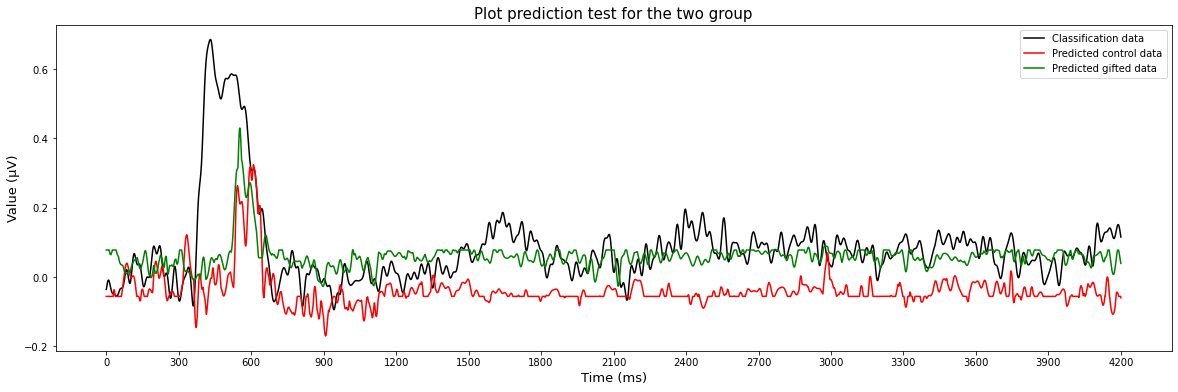

In [20]:
plt.figure(figsize=(20,6))
plt.plot(y_test, 'k', label='Classification data')
plt.plot(pred_control, 'r', label='Predicted control data')
plt.plot(pred_gifted, 'g', label='Predicted gifted data')
plt.xticks(np.arange(0, len(y_test), step=300))
plt.legend()
plt.title("Plot prediction test for the two group",fontsize=15)
plt.xlabel("Time (ms)",fontsize=13)
# plt.ylabel("Normalized value",fontsize=13)
plt.ylabel("Value (µV)",fontsize=13)
plt.savefig(f'outputs_fig/fig16_prediction_test_two_group.png')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_fig_visual/fig16_prediction_test_two_group.png')

In [21]:
#menor RMSE
if metrics[0][0] < metrics[1][0]:
    print('Sujeito classificado como do grupo Controle')
else:
    print('Sujeito classificado como do grupo Superdotado')

Sujeito classificado como do grupo Controle
